## Predicting Employee Attrition Using Machine Learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [4]:
df.rename(columns={"Work_accident": "work_accident",
                   "Department":"department",
                  "Attrition": "attrition"}, inplace=True)

In [5]:
df.dtypes

satisfaction_level        float64
last_evaluation_rating    float64
projects_worked_on          int64
average_montly_hours        int64
time_spend_company          int64
work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
attrition                   int64
dtype: object

In [6]:
#Check for Missing Values
df.isna().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
work_accident             0
promotion_last_5years     0
department                0
salary                    0
attrition                 0
dtype: int64

In [7]:
#Dimensions of our dataset
df.shape

(25491, 10)

In [8]:
#Summary for each variable
df.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,attrition
count,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000,25491.000000
mean,6.137704,7.167832,4.215174,205.286846,3.497156,0.146012,0.021419,0.234985
std,2.486316,1.710754,1.324228,50.182916,1.457715,0.353125,0.144780,0.423998
min,0.900000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,4.400000,5.600000,3.000000,160.000000,3.000000,0.000000,0.000000,0.000000
50%,6.500000,7.200000,4.000000,204.000000,3.000000,0.000000,0.000000,0.000000
75%,8.200000,8.700000,5.000000,249.000000,4.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,8.000000,320.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df["attrition"].value_counts()

attrition
0    19501
1     5990
Name: count, dtype: int64

## Data Visualization

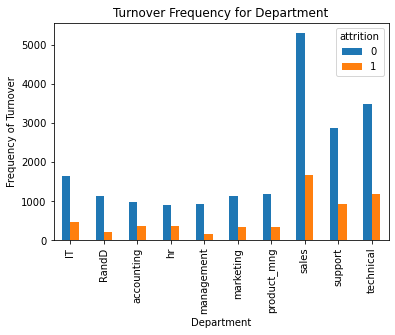

In [11]:
#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(df["department"], df["attrition"]).plot(kind = 'bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

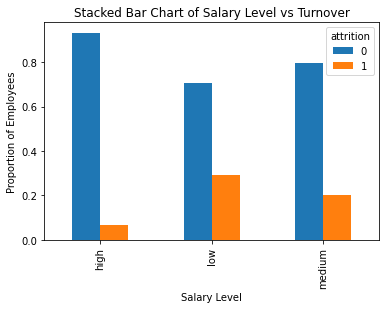

In [12]:
#Bar chart for employee salary level and the frequency of turnover
table = pd.crosstab(df["salary"], df["attrition"])
table.div(table.sum(1).astype(float), axis = 0).plot(kind = "bar")
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [13]:
#Proportion of employees left by department
pd.crosstab(df["department"],df["attrition"])

attrition,0,1
department,,
IT,1638,470
RandD,1130,205
accounting,966,350
hr,903,358
management,923,144
marketing,1121,334
product_mng,1183,331
sales,5298,1675
support,2866,935


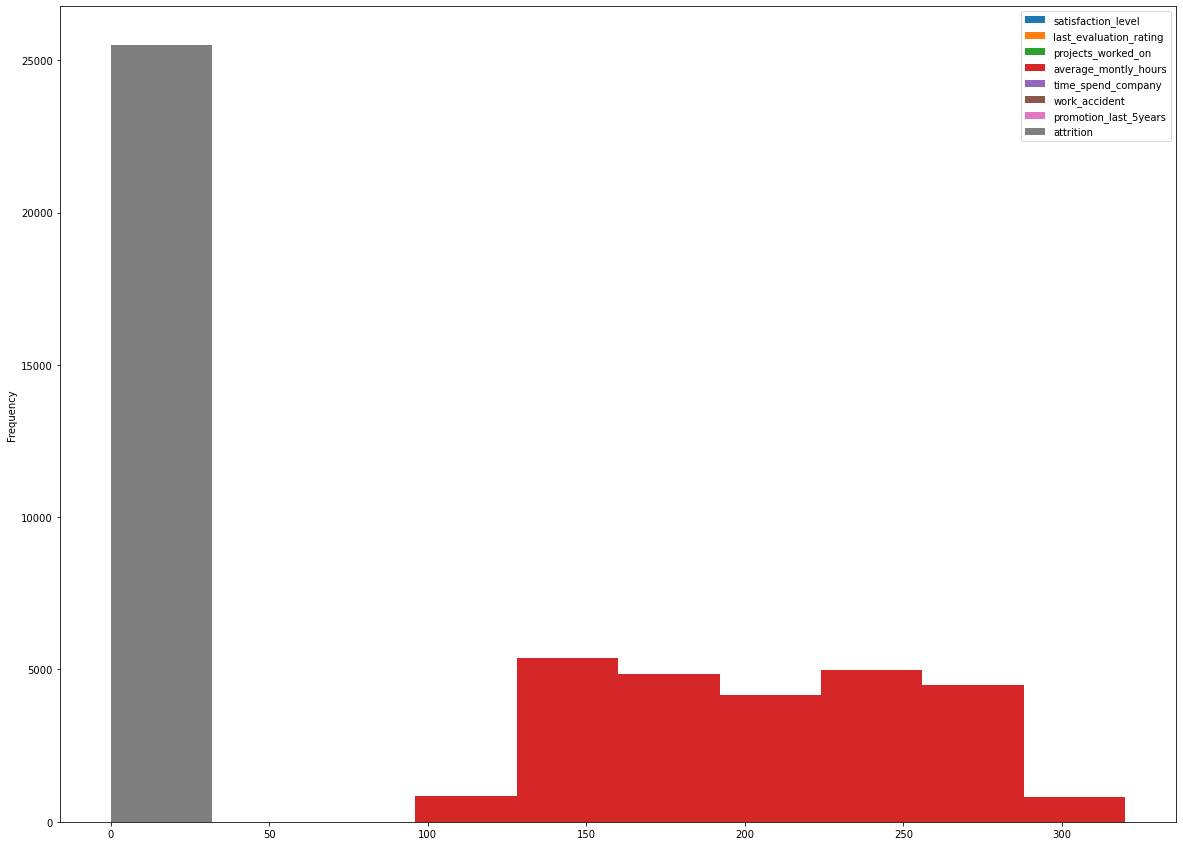

In [14]:
#Histogram of numeric variables
df.plot(kind = "hist", bins = 10, figsize=(20,15))
plt.savefig("df_hsitogram_plots")
plt.show()

In [15]:
df1 = pd.get_dummies(data=df, columns=["department", "salary"])
df =df1

In [16]:
df.head().T

,0,1,2,3,4
satisfaction_level,3.8,8.0,1.1,3.7,4.1
last_evaluation_rating,5.3,8.6,8.8,5.2,5.0
projects_worked_on,3,6,8,3,3
average_montly_hours,167,272,282,169,163
time_spend_company,3,6,4,3,3
work_accident,0,0,0,0,0
promotion_last_5years,0,0,0,0,0
attrition,1,1,1,1,1
department_IT,False,False,False,False,False
department_RandD,False,False,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   attrition               25491 non-null  int64  
 10  department_IT           25491 non-null  bool   
 11  department_RandD        25491 non-null  bool   
 12  department_accounting   25491 non-null  bool   
 13  department_hr           25491 non-null  bool   
 14  department_management   25491 non-null

In [18]:
df.drop(df.columns[[7,8]], axis = 1, inplace=True)

In [19]:
df.columns.values

array(['satisfaction_level', 'last_evaluation_rating',
       'projects_worked_on', 'average_montly_hours', 'time_spend_company',
       'work_accident', 'promotion_last_5years', 'attrition',
       'department_IT', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low',
       'salary_medium'], dtype=object)

In [20]:
cols=['satisfaction_level', 'time_spend_company', 'work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'] 
X=df[cols]
y=df['attrition']

### Logistic Regression Model

In [21]:
#Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5436  444]
 [1287  481]]


0.7736663179916318

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5740  140]
 [ 121 1647]]


0.9658734309623431

## SVM

In [28]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [29]:
y_pred = svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5466  414]
 [1286  482]]


0.7777196652719666

## XGBoost Classifier 

In [31]:
from xgboost import XGBClassifier

In [32]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
y_pred = xgb.predict(X_test)

In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5731  149]
 [ 144 1624]]


0.961689330543933

-------------------------------------------------

### Applying k-Fold Cross Validation For Random Forest

In [35]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.96 %
Standard Deviation: 0.46 %


### Applying k-Fold Cross Validation For SVM

In [36]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = svc, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.25 %
Standard Deviation: 0.69 %


### Applying k-Fold Cross Validation For XGBoost

In [38]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.03 %
Standard Deviation: 0.34 %


-----------------------------------------------------------

## Classification Report

In [39]:
#Classification report for Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5880
           1       0.92      0.93      0.93      1768

    accuracy                           0.97      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.97      0.97      0.97      7648



In [40]:
#Classification report for SVM

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      5880
           1       0.54      0.27      0.36      1768

    accuracy                           0.78      7648
   macro avg       0.67      0.60      0.61      7648
weighted avg       0.75      0.78      0.75      7648



In [41]:
#Classification report for XGBoost Classifier

print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5880
           1       0.92      0.92      0.92      1768

    accuracy                           0.96      7648
   macro avg       0.95      0.95      0.95      7648
weighted avg       0.96      0.96      0.96      7648



### Variable Importance for Random Forest Classifier

In [42]:
feature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
#The higher, the more important the feature.
importance = classifier.feature_importances_
feature_index_by_importance = importance.argsort()
for index in feature_index_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_RandD-0.48%
department_management-0.50%
promotion_last_5years-0.51%
salary_medium-0.52%
department_hr-0.58%
salary_high-0.97%
salary_low-1.05%
Work_accident-2.39%
time_spend_company-32.90%
satisfaction_level-60.11%


### Variable Importance for XGBoost Classifier

In [43]:
feature_index_by_importafeature_labels = np.array(['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low','salary_medium'])
#The higher, the more important the feature.
importance = xgb.feature_importances_
feature_index_by_importance = importance.argsort()
for index in feature_index_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

salary_medium-1.58%
department_management-2.24%
department_RandD-2.66%
department_hr-3.08%
salary_low-4.00%
promotion_last_5years-4.64%
Work_accident-6.85%
salary_high-8.48%
satisfaction_level-28.47%
time_spend_company-38.01%


## Hperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [47]:
classifier = RandomForestClassifier()

In [48]:
classifier = RandomizedSearchCV(estimator = classifier,
                               param_distributions= random_grid,
                               scoring='accuracy',
                               n_iter = 10,
                               cv = 5,
                               verbose = 2,
                               random_state=42,
                               n_jobs=1)

In [49]:
classifier.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  19.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  19.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  16.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
classifier.best_score_

0.965752875335905

In [62]:
classifier.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}